## Register to SciServer

It is convenient to use for this tutorial [SciServer](sciserver.org) with Jupyter notebook, because the necessary CasJobs python package is already installed there. Nevertheless, the SDSS database can be reached much faster from that server. Please go through the following steps to register, login and use SciServer.

1. Go to [SciServer registration](https://apps.sciserver.org/login-portal/register?). Set a user name and password.

2. [Login to SciServer](https://apps.sciserver.org/login-portal/)

3. Go to *Compute* module.

4. Create a new container with an arbitrary name and set the compute image to *Python + R*.

5. Go into the container and put this ipython file under Storage/\[user_name\]/persistent (documents in this folder won't be deleted).

6. That's all, you can use this notebook to complete the described tasks.

In [1]:
import os
import sys
import getpass

import numpy as np
import pandas as pd

from IPython.display import display

In [130]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

out = './out/'
figsave_format = 'png'
figsave_dpi = 200
pad_inches = 0.15

# Axis size parameters
axistitlesize = 22
axisticksize = 14
axislabelsize = 16
axistextsize = 14
axislegendsize = 20

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

In [2]:
os.listdir('../../SciScript-Python/py3/')
sys.path.append('../../SciScript-Python/py3/')

In [3]:
from SciServer import Authentication, CasJobs, SkyQuery

In [4]:
auth_name = 'masterdesky'
auth_pass = getpass.getpass()

 ···············


In [5]:
Authentication.login(auth_name, auth_pass);

# SQL Tutorial

## A Quick Introduction

Before you begin searching SkyServer, you should get a quick introduction what it means to search for data. SkyServer's information on all sky objects - stars, galaxies, and others - is stored in a database, a storehouse for data. A request to a database to return some information is called a query. When you ask a database for information, you must write your query in some computer language that the database can understand. SkyServer, like many other databases, uses Structured Query Language (SQL). When you write a query with SQL, the database searches for all records that meet your search criteria; in the case of SkyServer, each record is the information on a single observation of a single object in the sky.

But you have to be careful when you write a query: since the database contains hundreds of pieces of information for each of millions of objects, a poorly written query could return Gigabytes of information that won't help you at all. The best possible query will return all the information that you need, and no information that you don't need. Writing queries is an art - before you start writing, you need to think carefully about what information you need.

### The Database Structure

To know what information you need, you need to know exactly what information the database contains. The SkyServer database is divided into a series of tables. Each table contains data of a different type. For example, all data related to an object's spectrum are stored in a table called specObjAll. All data related to an object's image properties are stored in a table called photoObjAll. SkyServer contains many tables, although most of the commonly accessed data are stored in just three or four of them.

Each table contains a series of data columns. A column contains only one type of data - for example, magnitude or sky position. Each record consists of a series of columns, although some columns may be empty for some records. Some tables contain only two or three columns; some contain hundreds! Knowing exactly which table and which column contains the data you want can be a challenge.

<img src="http://skyserver.sdss.org/dr16/en/help/howto/search/images/photoprimary.jpg" width=500 height=500 >
A very, very, very, very small part of the photoPrimary table.
The full table contains more than 300 data columns and hundreds of millions of records.

### The Schema Browser

A tool called the [Schema Browser](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx) allows you to study all the tables and data columns, to find where the data you want are located. The Schema Browser can be intimidating, but it is easy to use. In the left-hand column, you can either browse through various tables to find a specific column, or you can search for keywords in all the column descriptions.

To browse through the tables, click on "Tables" in the left-hand column. (Note: some tables, like "specObj," are under "Views" instead...more on that later!) A list of all tables will appear under the Tables link. Click on the name of the one that you are interested in, and a list of that table's columns will appear on the right.

To search through all the tables to find a keyword, enter the keyword in the Search box and hit Go. A list of matching table columns and descriptions will appear on the right.

Try it now. Open the [Schema Browser](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx). In which table and data columns would you find the SDSS run-camcol-field classification numbers for the image of a single object? What about the object's type (star, galaxy, or other) as seen in its image? What about the redshift of a spectrum?

Although you have looked up data in the photoObjAll and specObjAll tables, for most queries you write you will not use those tables. Instead, you can use their associated views, which contain only the best SDSS observation for each object. Views you might use include:

photoObj: contains photometric (imaging) data for only the best observation of each sky object
star: contains best SDSS observations for stars only
galaxy: contains best SDSS observations for galaxies only
specObj: contains spectroscopic data for only the best observation of each sky object observed by the SDSS spectrograph
Now that you know how to find the information you need, you're ready to start querying the database for that information.

### A Simple Query

An SQL query consists of three pieces, or blocks: the select block, the from block and the where block.

The select block tells the database which columns of data you want it to return. You must separate each column name with a comma. For example, if you wanted to find the celestial coordinates right ascension (ra) and declination (dec) of an object, the select block might read

```sql
select
ra, dec
```

The from block specifies which table (or tables) you want to search. If you wanted to retrieve information from the specObj table, the from block would read

```sql
from
specObj
```

The where block allows you to search for records with certain characteristics. Your list of characteristics must be separated by the word "AND". Suppose you wanted to limit your search to a patch of sky with ra between 140 and 141 degrees and dec between 20 and 21 degrees. To search only this patch of sky, your where block would read

```sql
where
ra BETWEEN 140 AND 141 AND
dec BETWEEN 20 AND 21
```

The database will return only those records that have an ra between 140 and 141 and a dec between 20 and 21.

This query is shown in the query window below. Click Submit to send the query to the database. Results will appear in a new window. When you see the results, scroll through them to verify that all records have ra between 140 and 141 and dec between 20 and 21.

In [6]:
sql = """
SELECT TOP 10
    ra, dec
FROM
    SpecObj
WHERE
    ra BETWEEN 140 and 141 AND
    dec BETWEEN 20 and 21;
"""

res = CasJobs.executeQuery(sql, context='DR16')
display(res)

,ra,dec
0,140.00334,20.774178
1,140.00636,20.924277
2,140.01068,20.078152
3,140.01137,20.299723
4,140.01226,20.538016
5,140.01318,20.605621
6,140.01467,20.499697
7,140.01525,20.420310
8,140.01628,20.849852
9,140.01948,20.264171


## Writing Simple Queries

Now it's your turn to write some SQL queries! The query window below contains the sample query from the last page. Modify it to answer the questions in Practice 1 and Practice 2 below.

### Practice 1. 
What objects has the SDSS seen in a smaller area of the sky near
ra = 140.5, dec = 20.5 (the same area you searched in the previous query)?

Modify the previous query so it will return ra and dec of objects where the ra is between 140.25 and 140.75 and the dec is between 20.25 and 20.75. About how many objects did the query return? Does this seem to make sense, given the smaller area you searched here?

In [7]:
sql = """
SELECT TOP 10
    specObjID,
    ra, dec, sourceType, class
FROM
    SpecObj
WHERE
    ra BETWEEN 140 and 141 AND
    dec BETWEEN 20 and 21;
"""

res = CasJobs.executeQuery(sql, context='DR16')
display(res)

,specObjID,ra,dec,sourceType,class
0,2578371047459940352,140.00334,20.774178,GALAXY,GALAXY
1,10764860531976458240,140.04391,20.602971,ELG,GALAXY
2,2576223700781131776,140.10453,20.318369,STAR_CATY_VAR,STAR
3,2578346583326222336,140.05228,20.673180,GALAXY,GALAXY
4,6497631410278649856,140.08818,20.885167,LRG,GALAXY
5,6497632509790277632,140.10214,20.953650,LRG,GALAXY
6,10764857233441574912,140.06954,20.149851,ELG,GALAXY
7,10764859432464830464,140.11441,20.498138,ELG,GALAXY
8,10764860806854365184,140.04783,20.620595,ELG,GALAXY
9,10765886101581484032,140.06044,20.597464,ELG,GALAXY


In [8]:
sql = """
SELECT TOP 10
    specObjID,
    ra, dec, sourceType, class
FROM
    SpecObj
WHERE
    ra BETWEEN 140.25 and 140.75 AND
    dec BETWEEN 20.25 and 20.75;
"""

res = CasJobs.executeQuery(sql, context='DR16')
display(res)

,specObjID,ra,dec,sourceType,class
0,10765876205976834048,140.25261,20.610689,TDSS_RQS2v,QSO
1,6497624813208883200,140.26132,20.376150,LRG,STAR
2,6497627287110045696,140.26652,20.274860,LRG,GALAXY
3,10765875106465206272,140.27498,20.593559,ELG,GALAXY
4,10764848437348552704,140.27923,20.589846,ELG,GALAXY
5,10764858882709016576,140.28537,20.666678,ELG,GALAXY
6,10765865485738463232,140.29437,20.557636,TDSS_FES_ACTSTAR,STAR
7,2578334488698316800,140.30326,20.679935,STAR_RED_DWARF,STAR
8,2577272635025025024,140.32603,20.627772,GALAXY,GALAXY
9,2577271810391304192,140.34517,20.649198,STAR_WHITE_DWARF,QSO


### Practice 2. 
Which of the objects you found in Practice 1 are galaxies?

Open the [Schema Browser](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx). Click on views and select SpecObj. You will see a list of all the columns in the SpecObj table, along with short descriptions of what they mean and if applicable, what values the column may have.
display
For instance, if you scroll down to the "class" column, its description says that it may have one of the following values: 'STAR', 'GALAXY', or 'QSO'. Modify your query so that it returns the ra, dec, and best object ID for galaxies (and only galaxies) whose ra is between 140.25 and 140.75 and whose dec is between 20.25 and 20.75.

In [9]:
sql = """
SELECT TOP 10
    bestObjID,
    ra, dec, sourceType, class
FROM
    SpecObj
WHERE
    ra BETWEEN 140.25 and 140.75 AND
    dec BETWEEN 20.25 and 20.75 AND
    class='GALAXY';
"""

res = CasJobs.executeQuery(sql, context='DR16')
display(res)

,bestObjID,ra,dec,sourceType,class
0,0,140.25335,20.430728,ELG,GALAXY
1,1237667430093619286,140.26652,20.274860,LRG,GALAXY
2,1237667293189963907,140.26679,20.410276,GALAXY,GALAXY
3,1237667430630556360,140.26903,20.736134,ELG,GALAXY
4,1237667430630555834,140.26998,20.665789,GALAXY,GALAXY
5,1237667430630556705,140.27498,20.593559,ELG,GALAXY
6,1237667430630556380,140.27578,20.734178,ELG,GALAXY
7,1237667430630556212,140.27857,20.542991,ELG,GALAXY
8,1237667430630556706,140.27923,20.589846,ELG,GALAXY
9,1237667430093685425,140.28493,20.297197,ELG,GALAXY


## Commonly Searched Columns

The Schema Browser contains complete documentation on every table in the SkyServer database. But, most of the queries you will write will search through only a small subset of those tables. And even the commonly used tables contain many technical, esoteric items - most users will search for only a few columns.

Below is a list of some of the most commonly used tables (or views) and a short description of them. Click on any of the table names to be taken to a list of the most commonly used columns in that table. Take some time to understand what these columns mean, because you will use them over and over again in your queries. Click on a table (or view) name in the list below to launch a popup window showing the most commonly-searched data columns in that table/view.

[PhotoObj](http://skyserver.sdss.org/dr16/en/help/howto/search/photoobj.html) - stores information about the images of every object, including run, rerun, camcol, field, ra, dec, magnitudes and object flags.

[PlateX](http://skyserver.sdss.org/dr16/en/help/howto/search/platex.html) - stores information on the aluminum plates that the SDSS uses to take spectra, including their exposure times and reddening information. You will need to find the Plate and MJD in this table to look up an object's spectrum in the Get Spectra tool.

[SpecObj](http://skyserver.sdss.org/dr16/en/help/howto/search/specobj.html) - stores information on objects' spectra, including redshifts and spectroscopic classifications.

In addition, SkyServer contains several subsets of the PhotoObj table. PhotoPrimary contains only the "best" measurements of each object. Generally, it's better to use PhotoPrimary rather than PhotoObj, which contains both good and bad data. Star contains only data for stars, Galaxy contains only data for galaxies, and Unknown contains only data for objects classified as "unknown." These subsets are actually views rather than tables; you will learn the difference later in the tutorial.

### Two Other Tips

First, SkyServer's Query tool is limited to 90 seconds of search time and 100,000 results. If you want to write queries that return more than 100,000 objects, you have to be clever: split your query into multiple pieces. For example, if you are looking for stars between ra = 0 and ra = 3, you could write two queries, one from ra = 0 to ra = 1.5 and one from ra = 1.5 to ra = 3. Save all the results of the queries until you have all the results you want.

Or, you can get around the limit completely writing your query in [CasJobs](http://casjobs.sdss.org/casjobs/), which has no limits on search time or number of results.

If you want the query to return fewer results, you can add the statement "top n" to the select block, where n is some integer from 1 to 1,000. For example, when you're testing to see if a query returns reasonable results, you might not want to have to wade through 1,000 records. You might want to have the query return 10 records instead; use "select top 10".

Second, SQL is not case-sensitive, meaning capital and lowercase letters are the same. The commands "select," "Select," "SELECT" will all do the same thing. But, it's a good idea to use capitalization and spacing to make your queries as easy as possible for other people to understand.


## More Sample Queries
Look at the following query:

```sql
select top 10
    z, ra, dec, bestObjID
from
    specObj
where
    class = 'galaxy' 
    and z > 0.3 
    and zWarning = 0
```

The SELECT and FROM blocks tell the database to look in the specObj table (which contains spectroscopic information) and return the redshift (z), the right ascension, the declination, and the (final, or "best") object ID. The WHERE block tells the database to look only at galaxies with redshifts above 0.3 and no known problems with the redshift determination (zWarning = 0).

### Logical Operators

In this query, the word AND appears between all the characteristics in the where block. The query includes three characteristics - matching objects must be galaxies, they must have redshift > 0.3, and there must be no warnings about the redshift determination. All three of these characteristics must be met by a given record for the search to return that record.

AND is just one of three logical operators used by SQL; the others are OR and NOT. The meanings of the three logical operators are given in the table below:

| Logical Operator | Meaning                         |
|------------------|---------------------------------|
| AND              | all characteristics met         |
| OR               | at least one characteristic met |
| NOT              | characteristic not met          |

You can combine the logical operators using parentheses. For example, for the characteristics A, B, and C, A AND (B OR C) means that either characteristics B or C, as well as characteristic A, must be met for records to match. What does A AND (NOT B) mean?

The query below is like the first query except that it will return both galaxies and quasars. The OR statement in the where block causes the query to return both.

```sql
select top 10 
    z, ra, dec, bestObjID
from
    specObj
where
    (class = 'galaxy' or class = 'qso')
    and z > 0.3 
    and zWarning = 0
```

## Mathematical and Conditional Operators

SQL includes a variety of mathematical operators that perform math functions in a query. You can use multiplication, division, addition and subtraction. SQL uses the same symbols for these operators that most other computer languages use: + for addition, - for subtraction, * for multiplication, and / for division. Other mathematical operators include COS(x), which returns the cosine of column x, or SQRT(x), which returns the square root of column x. Here is a complete list  (new window) of SQL's mathematical operators.

You can also use the conditional operators summarized below.


| Conditional | Meaning                  |
|-------------|--------------------------|
| =           | equal to                 |
| >           | greater than             |
| <           | less than                |
| >=          | greater than or equal to |
| <=          | less than or equal to    |
| <>          | not equal to             |

Let's say you wanted to find a list of very blue stars. In astronomy, color is defined by the differences in magnitudes (see the [SkyServer Color Project](http://skyserver.sdss.org/dr16/en/proj/advanced/color/colorhome.aspx) for more information). In the SDSS's system of measurement, blue stars have u-g < 0.5. So to find blue stars, you might write a query like the following:

```sql
select top 10
    ra, dec, modelMag_u, modelMag_g, modelMag_r, modelMag_i, modelMag_z, objID
from
    photoObj
where
    type = 6 
    and modelMag_u - modelMag_g < 0.5
```

This query returns the first 10 photometric objects (in the PhotoObj table) that are labeled as stars (denoted by type = 6) where u - g < 0.5. You could further refine your query by searching for a certain ra and dec. Or you could limit yourself to bright stars by specifying a magnitude limit such as modelMag_r < 17.

### Try It!

Try the following queries. Write down a few of the ObjIDs, then use [SkyServer's Explore](http://skyserver.sdss.org/dr16/en/tools/explore/Summary.aspx) tool to examine the objects. Do they have the characteristics you requested in the where block? What kinds of astronomy questions do you think you could answer by studying these objects?

In [10]:
query = """
SELECT TOP 10
    bestObjID,
    ra, dec, z
FROM
    specObj
WHERE
    class = 'GALAXY' AND
    z > 0.3 AND
    zWarning = 0;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,bestObjID,ra,dec,z
0,1237668330957439346,227.472170,12.210968,0.300001
1,1237658203986460871,222.989820,42.629408,0.300001
2,1237660241924063461,49.459411,0.847754,0.300001
3,1237668293908562074,166.025240,19.171481,0.300002
4,1237648705135903173,233.525750,0.431620,0.300002
5,1237658425162858683,156.250240,7.658627,0.300003
6,1237650760782053596,184.905010,-3.309509,0.300003
7,1237667112794128729,136.361780,22.886210,0.300005
8,1237661950275748220,234.049530,8.577134,0.300005
9,1237655468065620483,236.619520,0.796788,0.300005


In [11]:
query = """
SELECT TOP 10
    bestObjID,
    ra, dec, z
FROM
    specObj
WHERE
    (class = 'GALAXY' or class = 'QSO') AND
    z > 0.3 AND
    zWarning = 0;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,bestObjID,ra,dec,z
0,1237668330957439346,227.472170,12.210968,0.300001
1,1237658203986460871,222.989820,42.629408,0.300001
2,1237660241924063461,49.459411,0.847754,0.300001
3,1237668293908562074,166.025240,19.171481,0.300002
4,1237648705135903173,233.525750,0.431620,0.300002
5,1237658425162858683,156.250240,7.658627,0.300003
6,1237650760782053596,184.905010,-3.309509,0.300003
7,1237667112794128729,136.361780,22.886210,0.300005
8,1237661950275748220,234.049530,8.577134,0.300005
9,1237655468065620483,236.619520,0.796788,0.300005


In [12]:
query = """
SELECT TOP 10
    objID,
    ra, dec,
    modelMag_u, modelMag_g, modelMag_r, modelMag_i, modelMag_z
FROM
    photoObj
WHERE
    type = 6 AND
    modelmag_u - modelmag_r < 0.5;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,1237662640663823014,253.237487,19.576159,24.14190,24.74438,24.21562,22.27413,21.11945
1,1237663478175564137,311.682786,-0.823729,24.34037,25.40042,23.90314,21.38570,21.06514
2,1237663478175564138,311.683127,-0.825057,23.23000,26.43901,23.61066,21.53102,21.10401
3,1237663478175564157,311.687614,-0.653722,24.82936,25.37076,24.77795,22.20153,21.43627
4,1237663478175564158,311.687187,-0.649422,23.35764,23.09445,25.21556,22.76028,22.51767
5,1237663478175564233,311.711262,-0.682110,28.75299,28.62782,28.90881,27.90419,19.41039
6,1237648673965539461,175.997717,-0.128094,22.55591,24.28548,22.63540,22.21246,22.02071
7,1237662266462961957,226.666125,4.692835,23.78733,23.47799,24.80205,24.36178,22.82661
8,1237662266462961970,226.690146,4.684301,24.69190,25.51844,25.39879,22.49154,22.80035
9,1237662266462962009,226.606338,4.726755,22.24101,25.43700,25.14712,24.51898,23.52367


## More Practice Queries

Write queries to answer the astronomy questions in Practice 3 and 4. Use the [Schema Browser](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx) when you need it.

### Practice 3. 
What are the reddest galaxies in the area of sky near ra = 141?

Write a query to search for galaxies between ra = 140.9 and ra = 141.1 brighter than
g = 18.0 for which u - g > 2.2. Retrieve the Object ID, ra, dec, and the five final magnitudes.

In [13]:
query = """
SELECT TOP 10
    objID, type,
    ra,dec,
    modelMag_u, modelMag_g, modelMag_r, modelMag_i, modelMag_z
FROM
    photoObj
WHERE
    ra BETWEEN 140.9 and 141.1 AND
    type = 3 AND
    modelmag_u - modelmag_g > 2.2 AND
    modelMag_g < 18.0
ORDER BY
    modelMag_r ASC;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,objID,type,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,1237660960792969238,3,140.960129,34.548154,10.52945,8.168000,6.870014,6.603143,8.006196
1,1237661384381366345,3,140.960313,34.548093,10.10585,7.648856,7.029086,6.616683,7.254035
2,1237667141256675426,3,141.077852,23.579218,10.86067,8.266227,7.459249,7.252854,8.030453
3,1237653589027127421,3,140.959899,55.193611,11.18966,8.172001,7.566698,7.228342,7.663043
4,1237661069244366890,3,141.039021,10.546895,12.52834,8.885955,7.665212,10.757210,7.452698
5,1237664094514905146,3,140.979022,32.197311,12.75329,9.197783,8.347772,8.004050,8.797567
6,1237657775008383186,3,141.072466,42.979966,12.27027,9.316073,8.407198,7.984589,7.774977
7,1237663529190948935,3,141.013452,61.773043,12.81551,9.027059,8.470563,8.501796,9.928471
8,1237660763768553533,3,141.010497,34.797000,13.08173,9.158810,8.629912,8.584732,8.885653
9,1237663918421508154,3,140.968531,67.710051,14.53411,9.392114,8.642077,8.315048,8.963595


### Practice 4. 
What are the highest-redshift quasars in the SDSS database?

Write a query to search for quasars for which we have obtained spectra (search the specObj table) with redshifts greater than 4.5 and good measurements (zWarning = 0). Retrieve each quasar's Photo ID, ra, dec, and redshift.

In [14]:
query = """
SELECT TOP 10
    specObjID, bestObjID,
    ra, dec, z
FROM
    SpecObj
WHERE
    class = 'QSO' AND
    z > 4.5 AND
    zWarning = 0
ORDER BY
    z DESC;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,specObjID,bestObjID,ra,dec,z
0,6604651000581345280,1237668591340290733,200.996950,17.910995,7.042325
1,10595954384730083328,1237663277929857648,4.845849,0.617604,7.040539
2,12726162512040710144,1237678598083838954,344.815880,3.018781,7.040409
3,9578186770333585408,1237659329236566645,235.278200,47.039639,7.032396
4,12699032887611379712,1237669679577367049,0.306355,6.436817,7.030458
5,8174275878047731712,0,86.158514,-8.397181,7.029691
6,8354348121250353152,1237661434309837083,189.847870,47.317133,7.028330
7,12451347828474925056,1237678600778220022,23.437138,16.080012,7.025483
8,8606653064106233856,1237680332703466448,333.200650,26.166307,7.023917
9,8175265986993475584,1237646794374906671,80.500381,1.336820,7.021413


## Querying from multiple tables: Joining

Take another look at the [Schema Browser](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx). Data on the same objects are often stored in different tables and/or views. For example, a galaxy's magnitudes are stored in the photoObj view, its redshift in the specObj view, and the plate used to observe its spectrum in the plateX table.

Quite often, you will want to compare information from many different tables. For example, making a Hubble Diagram to show the expansion of the universe requires some measure of brightness, such as magnitude, and redshift. Magnitude is in the photoObj table; redshift is in the specObj table. How do you search both tables?

You can search multiple tables using SQL's join syntax. You will need to designate one table/view as the base table onto which other tables will be temporarily joined - at this stage it doesn't matter which is the base table and which table(s) are joined to it. Put the name of the base table in the FROM block of the query, and give it a shorthand name to refer to it. For example, if you want to use photoObj as the base table, you might say:

```sql
FROM photoObj p
```

List the other tables you want to search, one line at a time, using SQL's JOIN...ON syntax. On each line, use the keyword JOIN, the name of the table, a nickname for the table to be joined, and the keyword ON. After the ON, specify the name of the column you want to use to do the join, both in the base table and in the table you want to join. The column may be called something different in the two tables, so study the Schema Browser carefully. For example, so temporarily join the photoObj and specObj views, you would say:

```sql
FROM photoObj p
JOIN specObj s ON s.bestObjID = p.objID
```

At this point, it doesn't matter what order the two tables appear in.

For example, look at the following query:

```sql
SELECT top 100
    x.plate, x.mjd, 
    s.fiberID, 
    p.modelMag_u, p.modelMag_g, 
    p.modelMag_r, p.modelMag_i, 
    p.modelMag_z,
    p.ra, p.dec,
    s.z, p.ObjID
FROM photoObj p
JOIN specObj s ON s.bestObjID = p.objID
JOIN plateX x ON x.plateID = s.plateID          
WHERE
    s.class = 'qso' 
    and s.zWarning = 0 
    and s.z between 0.3 and 0.4
```

As this query demonstrates, you don't have to join all tables on to the base table - you can join tables onto other join-ed tables as well.

To join two tables, look for common entries - when the same column appears in both tables. The columns that appear after the ON keyword, connected by an equals sign, will be the names of the same column in each table.

To find columns to use in joining tables, look in the [Schema Browser](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx). Find places where the same column name appears in more than one table. You can use that column in the where block to join the tables.

Naming tables in the SELECT and WHERE blocks — either by their full name or by the nickname you specify — is important because sometimes columns in different tables have the same name, yet contain different data. For example, the PhotoObj table contains the right ascension and declination of the object in the "ra" and "dec" columns. The PlateX table also has ra and dec columns, but these are the ra and dec of the telescope while it is observing a single plate, not the ra and dec of an individual object on the plate. So photoObj.ra and plate.ra mean totally different things!

In addition to the join statements, the query above includes two other commands in the where block. The command specObj.class = 'qso' tells the query to return quasars only, and the command specObj.zWarning = 0 tells the query to return only objects for which we have well-measured redshifts. Again, you can add more restrictions to your query in terms of colors, magnitudes, ra and dec or any number of parameters.

### Try It!

Submit the following query. If you would like, try rewriting the query using one-letter nicknames for all the tables.

In [15]:
sql = """
SELECT TOP 100
    p.ObjID,
    x.plate, x.mjd, s.fiberID,
    p.ra, p.dec, s.z,
    p.modelMag_u, p.modelMag_g, p.modelMag_r, p.modelMag_i, p.modelMag_z
FROM
    PhotoObj p
JOIN
    specObj s ON s.bestObjID = p.objID
JOIN
    plateX x ON x.plateID = s.plateID
WHERE
    s.class = 'QSO' AND 
    s.zWarning = 0 and s.z BETWEEN 0.3 and 0.4;
"""

res = CasJobs.executeQuery(sql, context='DR16')
display(res.head(n=10))

,ObjID,plate,mjd,fiberID,ra,dec,z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,1237651737382158532,533,51994,362,213.338788,2.930970,0.314000,19.87684,19.38468,18.53615,18.19708,17.73288
1,1237651736844632212,532,51993,468,211.836235,2.598072,0.309549,19.87597,19.66852,18.92564,18.62483,17.97938
2,1237651753468428372,510,52381,198,168.509029,2.147648,0.308165,20.05744,19.66128,19.20290,19.13103,18.72326
3,1237654599954137274,502,51957,521,153.209173,3.156213,0.307656,18.62282,18.55857,18.45698,18.44678,17.93796
4,1237649962453434502,458,51929,513,46.149021,-7.618087,0.306103,17.56013,17.51593,17.40258,17.49241,16.99355
5,1237652901301649614,455,51909,428,38.549045,-7.760658,0.309629,21.86445,20.95769,19.51860,19.45904,18.93876
6,1237652899689922621,454,51908,297,36.071525,-9.430351,0.311468,18.04004,17.97364,17.92230,18.03085,17.52690
7,1237651191899226265,452,51911,457,143.879340,58.820016,0.308679,19.69586,19.27721,18.68593,18.46231,17.95501
8,1237651252557775075,443,51873,367,125.651892,49.373820,0.305168,19.89557,19.41150,18.77625,18.50622,18.07652
9,1237660241925701788,415,51810,411,53.274851,0.959976,0.311979,19.54283,19.26949,18.94949,18.88865,18.28574


## Practice Using Joins
Write queries to answer the astronomy questions in Practice 5 and 6. Use the [Schema Browser](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx) when you need it.

### Practice 5.

How can you look up image data, plates and spectra of moderately bright nearby galaxies?

Write a query to find 100 galaxies for which we have spectra that have g magnitude between 17 and 17.4 and redshift less than 0.05. For each galaxy, retrieve the object ID, the five magnitudes (u,g,r,i,z), the redshift, the plate/MJD number, and the fiber number.

In [16]:
sql = """
SELECT TOP 100
    p.ObjID,
    x.plate, x.mjd, s.fiberID,
    p.ra, p.dec, s.z,
    p.modelMag_u, p.modelMag_g, p.modelMag_r, p.modelMag_i, p.modelMag_z
FROM
    PhotoObj p
JOIN
    specObj s ON s.bestObjID = p.objID
JOIN
    plateX x ON x.plateID = s.plateID
WHERE
    s.class = 'GALAXY' AND
    p.modelMag_g BETWEEN 17 and 17.4 AND
    s.z < 0.05 AND
    s.zWarning = 0;
"""

res = CasJobs.executeQuery(sql, context='DR16')
display(res.head(n=10))

,ObjID,plate,mjd,fiberID,ra,dec,z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,1237655744557285690,1817,53851,46,228.642503,5.950402,0.035113,18.88469,17.13193,16.33802,15.96464,15.66793
1,1237662197747941691,1818,54539,539,230.358837,7.728443,0.045150,19.06037,17.17824,16.33821,15.93534,15.62233
2,1237662236946202775,1814,54555,90,223.307120,7.377599,0.045888,18.60893,17.38126,16.94209,16.69482,16.59123
3,1237662238019616946,1814,54555,455,222.652073,8.245225,0.028100,18.81264,17.30235,16.63815,16.29533,16.05622
4,1237662238019748083,1814,54555,473,222.945852,8.144144,0.035886,18.47076,17.20041,16.65312,16.38422,16.16009
5,1237662238021845318,1817,53851,472,227.889502,7.727530,0.044685,18.34295,17.37691,17.07942,16.82235,16.70798
6,1237662238021910793,1817,53851,464,227.973680,7.690027,0.044836,18.82706,17.09082,16.30306,15.93924,15.65965
7,1237662238023745940,1819,54540,546,232.237876,7.208590,0.041219,18.82607,17.04423,16.21088,15.82587,15.53541
8,1237662238023811406,1819,54540,541,232.366259,7.198152,0.044638,18.95343,17.08438,16.21406,15.80029,15.44987
9,1237662238554521824,1812,53795,442,218.206647,9.086323,0.026184,18.23065,17.25599,16.86883,16.68913,16.55527


## Aggregate Functions

All the queries you have written so far return every record that matches the criteria in the where block. But with SQL, you can also return statistical summaries of all matching records. For example, look at the query below:

```sql
select
    min(dec) as min_dec, max(dec) as max_dec, avg(dec) as avg_dec
from
    photoObj
where
    run = 5112
```

The query retrieves the minimum, maximum, and average declination of one of the SDSS's equatorial stripes (the area of the survey near the celestial equator, dec = 0). The commands min(x), max(x), and avg(x) are aggregate functions, named because they operate on an aggregate, or sum, of all the matching records. SQL's aggregate functions are listed in the table below:

| Aggregate Function | Returns...                                        |
|--------------------|---------------------------------------------------|
| min(x)             | the smallest value in column x                    |
| max(x)             | the largest value in column x                     |
| avg(x)             | the average value in column x                     |
| stdev(x)           | the standard deviation of the values in column x  |
| count(x)           | the number of values in column x                  |
| count(*)           | the number of records in the table being searched |

The difference between count(x) and count(\*) can appear confusing, but they are usually used in different situations. Use count(\*) to find out the number of records in a table - how big the table is. The command "select count(\*) from specObj" returns 608801 - meaning there are 608,801 separate records in the specObj table. The command "select count(\*) from PhotoPrimary" returns 180,235,043.

Unlike count(\*), count(x) is usually used with a characteristic listed in the where block. For example, the query below returns the number of records in the specObj table that have redshift between 0.5 and 1: 14,759. So the number of objects with redshift between 0.5 and 1 found by count(x) is much less than the total number of objects in specObj, found by count(\*).

```sql
select
    count(z) as num_redshift
from
    specObj
where
    z BETWEEN 0.5 AND 1
```

### Try It!

Try out the following queries! Do you get what you expected? Do the results seem reasonable to you?

In [17]:
query = """
SELECT
    min(dec) AS min_dec,
    max(dec) AS max_dec,
    avg(dec) AS avg_dec
FROM
    photoObj
WHERE
    run=5112;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,min_dec,max_dec,avg_dec
0,8.916169,28.753649,20.275834


In [18]:
query = """
SELECT
    count(z) AS num_redshift
FROM
    specObj
WHERE
    z BETWEEN 0.5 and 1;
"""
res = CasJobs.executeQuery(query, context='DR16')
display(res)

,num_redshift
0,1362255


## The Group By Command

The previous query searched through the entire SpecObj table and returned the number of objects between redshifts 0.5 and 1. But instead of lumping all objects together, you can display results sorted by another trait. You can group all results containing a given trait with SQL's group by command. For example, you could group the results of the query above to show how many of the objects between z = 0.5 and 1 are stars, galaxies, quasars, or other.

To collect together all the different objects in the query above, you would use the command group by class. Add this command to the end of the query, after the where block. Be sure to select the class column in the select block, so you can know which class column corresponds to which result. So the new query will look like this:

```sql
select
    class, count(z) as num_redshift
from
    specObj
where
    z BETWEEN 0.5 AND 1
group by 
    class
```

The group by command will work with any of the six aggregate functions. The column in the group by command must be in one of the tables in the from block. The column used in the group by command must be returned in the select block, either by itself or as part of an aggregate function.

### Try It!

In [19]:
query = """
SELECT
    class,
    count(z) AS num_redshift
FROM
    specObj
WHERE
    z BETWEEN 0.5 and 1
GROUP BY
    class;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,class,num_redshift
0,GALAXY,1198272
1,QSO,163983


## The Order By Command

Sometimes, you might want to ask questions containing the words "the most" and "the least." For example, you might want to know on which dates specific SDSS spectroscopic plates were observed. One easy way to answer this question would be to retrieve those plates ordered by the [Modified Julian date (MJD)](https://en.wikipedia.org/wiki/Julian_day#Variants) on which they were observed, in order from the first date to the last date. SQL's ORDER BY command will sort records in ascending order according to a specified column.

The "plateX" table contains data on SDSS plates (spectroscopic observations of one area of sky). Plates are organized by two numbers: the plate number (plate) and the observation date (mjd). Sometimes multiple plates are observed in one night, and sometimes a single plate is spread out over several nights, so both numbers are necessary.

To look at a few plates - in this case, just the ones numbered 275 or less - in order of observation date - use the ORDER BY command. The syntax of ORDER BY is simple: just type "order by" followed by the name of the data column by which you want to sort. If you want the data sorted in descending order, from most to least, add "desc" to the end of the command.

To sort plates by observation date, then, use the query below:

```sql
select mjd,plate
from plateX
where plate <= 275
order by mjd
```

The order by command also works with the group by command. Use them both together when you want to sort groups of records by a trait you chose to return. Put the group by command after the where block, followed by the order by command. Make sure that the column you list in the order by command is also in the group by command OR contains an aggregate function.

### Try It!

Modify the query below to order by plate number instead of MJD. Which of the plates was observed over more than one night?

See the [Plate Browser](http://skyserver.sdss.org/dr16/en/tools/getimg/plate.aspx) for a list of the plates available in Data Release 16.

In [20]:
query = """
SELECT
    mjd, plate
FROM
    plateX
WHERE
    plate <= 275
ORDER BY
    mjd;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,mjd,plate
0,51581,269
1,51602,266
2,51608,267
3,51630,266
4,51633,268
5,51883,271
6,51909,270
7,51910,275
8,51910,269
9,51913,274


## Practice Using Aggregate Functions, Group By, and Order By

Write queries to answer the astronomy questions in Practice 7, 8, and 9. Use the [Schema Browser](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx) when you need it.

### Practice 7.
What are the northernmost and southernmost objects with spectra measured by the SDSS?

In [21]:
query = """
SELECT
    min(dec) AS min_dec,
    max(dec) AS max_dec,
    avg(dec) AS avg_dec
FROM
    specObj;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,min_dec,max_dec,avg_dec
0,-19.702714,84.852144,23.922331


In [22]:
query = """
SELECT TOP 2
    bestObjID,
    ra, dec, z
FROM
    specObj
WHERE
    dec =
    (
        SELECT
            min(dec)
        FROM
            specObj
    )
    OR
    dec =
    (
        SELECT
            max(dec)
        FROM
            specObj
    );
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,bestObjID,ra,dec,z
0,1237672793966510236,7.715366,-19.702714,0.000248
1,1237671073834205296,95.375494,84.852144,-0.001215


### Practice 8. 
What is the redshift of the nearest galaxy whose spectrum was measured by the SDSS with high confidence (zWarning=0)? Use the equation

$cz = H_{0}d$

to find the distance to the galaxy in light-years. The speed of light, c, is 1 light-year per year. The constant H_{0}, called the Hubble constant, is about 70 km/s/Mpc, or
$7.11 x 10^{-11} / yr$.

Compare the distance you found to the distances to the Andromeda Galaxy (2 million light-years) and the Whirlpool Galaxy (37 million light-years). Does the distance you found seem reasonable?

In [23]:
query = """
SELECT TOP 1
    bestObjID,
    ra, dec, z
FROM
    specObj
WHERE
    z =
    (
        SELECT
            min(z)
        FROM
            specObj
        WHERE
            class = 'GALAXY' AND
            zWarning = 0
    );
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,bestObjID,ra,dec,z
0,1237660025031295138,338.63071,-0.761237,-0.01023


In [24]:
c = 1 # light year / year
H_0 = 7.11e-11 # 1 / year
z = res['z'][0]
d = c*z / H_0
print("Distance of this galaxy is {0:.0f} million ly.".format(d/1e06))

Distance of this galaxy is -144 million ly.


#### Conclusion

This value is clearly isn't right. The truth is, that the Hubble-Lemaître law doesn't work for too small distances. Locally the gravitational effects between galaxies are much stronger, than the velocity component that arises from the expansion of the universe.

### Practice 9. 
What field has galaxies with the highest average redshifts in run=5112, camcol=1?

Be sure you are searching fields (as run-camcol-field) for galaxies. Also look at how many spectrally measured galaxies are in the field - make sure you don't pick a field with only one or two galaxies! Also, note that this query will probably take a long time to execute.

Notice that these practice questions have gotten more difficult, and are more like the questions that astronomers really ask in their research. You're getting better in your searches!

In [197]:
query = """
SELECT
    p.field AS run_calcol_field,
    count(p.objID) AS n_galaxies,
    count(s.bestObjID) AS n_spec,
    max(p.z) AS max_z
FROM
    photoObj p
FULL JOIN
    specObj s
ON
    s.bestObjID = p.ObjID
WHERE
    p.type = 3 AND
    p.run = 5112 AND
    p.camcol = 1
GROUP BY
    p.field
HAVING
    count(p.objID) > 2
ORDER BY
    max_z DESC;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res.head())
display(res.tail())

,run_calcol_field,n_galaxies,n_spec,max_z
0,195,403,7,30.24739
1,194,436,8,29.78776
2,63,578,8,29.59990
3,192,504,13,29.59684
4,26,478,0,29.52946


,run_calcol_field,n_galaxies,n_spec,max_z
437,129,355,0,23.70399
438,44,583,0,23.70116
439,467,448,0,23.68459
440,119,430,0,23.65461
441,123,331,0,23.53002


## Views

Look again at the left column of the [Schema Browser](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx). You already know what a table is - a storehouse for data of the same type. But what about those other terms?

A view is a virtual table created by combining records from real tables. The records that make up a view remain in their original tables, but they can be accessed and searched through the view.

What does this mean for you? If you're a database programmer, the difference is crucial. For the rest of you, the difference is... nothing. For the purpose of searching for data, a view is a table, and a table is a view. You can search views just like tables, by listing them in the from block.

In fact, many of the so-called "tables" you have been using are actually views! The specObj "table" is actually a view created from the specObjAll table, which contains both good and bad spectra. The PhotoPrimary, Star, Galaxy, and Unknown databases are all views created from the PhotoObjAll table. You've been using these views all along!

Try searching the same area of sky using the SpecObjAll table and the SpecObj view, or the PhotoObjAll table and Star, Galaxy, or Unknown views. What differences do you see?

One particularly important view is the SpecPhoto view, which contains photometric and spectroscopic information on the same objects. Using SpecPhoto is just like doing a join between SpecObj and PhotoObj, but SpecPhoto is easier to use, and your queries will run faster.

## Functions

In computer programming, a function is a mini-program that takes a given input, does something, and returns an output. In a database search, functions have the same structure: they take inputs, execute a mini-program, and return some output. The Schema Browser lists over 100 functions. This tutorial will cover two important functions.

### Position Searches and fGetNearbyObjEq

In this tutorial, you have done several searches for objects near a specific position, using the BETWEEN command in the where block. But a function called fGetNearbyObjEq gives you more control over where in the sky you search. The function fGetNearbyObjEq takes three inputs: an RA, a dec, and a radius in arcminutes (the full moon is about 30 arcminutes across). It returns all objects within the circular area with a center at the specified (ra,dec) point and a radius of the radius entered.

Because fGetNearbyObjEq returns a list of objects, you can search through the list just like a table. You can include fGetNearbyObjEq in the from block of your queries, and join it to a table or view using the ObjID column. To search the sky for all galaxies within 5 arcminutes of ra = 140, dec = 20, use this query:

```sql
SELECT
    p.ObjID, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z
FROM photoObj p
JOIN dbo.fGetNearbyObjEq(140,20,5) n ON n.objID = p.objID
WHERE
    p.type = 3
```

### Flags and Photo Flag Functions

For every object identified in an image, the SDSS stores a set of flags, yes/no data telling whether some attribute is true for that object. Flags are available for objects too close to the edge of a frame, for objects whose images were saturated (so bright that some light was not detected), or for objects with some pixels not detected by the camera.

Flags are stored in the flags column of the PhotoObj table (and its related views). Take a moment to look in the [Schema Browser](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx) to learn what the photo flags are. Then, search for photo flags with the command "select flags from photoObj". What do you get?

You get nothing but a long, confusing number! Each object in the PhotoObj table may have many true/false flags associated with it. To save memory, the flags are not stored as true/false lists, but as components of a long number - each flag is stored as a specific value at a specific position.

Unfortunately, while this technique may save memory, it makes the flags impossible for humans to understand. Fortunately, SkyServer includes a function, fPhotoFlagsN, to translate photo flags from confusing numbers into English names.

The syntax for calling a function in SQL is to type "dbo." - the letters dbo and a period - in front of the function name. Then type the name, then enclose the function's
input(s) in parentheses. The function fPhotoFlagsN takes one input, and it is (almost) always the flags column of the PhotoObj table. So the syntax for calling the function would be:

dbo.fPhotoFlagsN(flags)

For example, you might want to find English names for flags of all stars around the point 175,1. The query would look like this:

```sql
SELECT
    p.objID, p.flags, dbo.fPhotoFlagsN(p.flags)
FROM photoObj p
JOIN dbo.fGetNearbyObjEq(140,20,5) n ON n.objID = p.objID
WHERE
    p.type = 6
```

The query returns flags as both numbers and names. You can see that the names are much easier to understand!

Sometimes, instead of looking at all flags for many objects, you might want to select only objects that meet certain flags. In other words, you might want to use a flag as part of a where block. Unfortunately, fPhotoFlagsN can't search for a flag - it can only list flags that are present for a certain object. Fortunately, SkyServer includes another function that can help you search for flags - the similarly named fPhotoFlags.

To understand how fPhotoFlags works, remember that a flag is a true/false statement. If a flag is true, it will have some positive value, which will depend on the flag. But if the flag is false, its value will be zero, and always zero. So to find out if a flag is true for a given object, just compare its value to zero. If the flag's value is greater than zero, the flag is true; if the flag's value is equal to zero, it is false.

But how do you know which flag you are checking? The function fPhotoFlags translates the name of a single flag. For example, if you wanted to look for all unsaturated objects - all objects with the SATURATED flag set to false - you could use
fPhotoFlags('SATURATED').

But remember that fPhotoFlags only translates the name of the flag from computer-speak to English. To actually check the value of the flag, you still need to search the flags column of the photoObj table. To search records for the presence of an English-language flag using fPhotoFlags, you need to use an ampersand (&). The syntax is "where (flags & dbo.fPhotoFlags(name)) \[> or =\] 0". So to search for all unsaturated objects near the point (175,1), you would use the following query:

```sql
SELECT
    p.objID, p.ra, p.dec, dbo.fPhotoFlagsN(p.flags)
FROM photoObj p
JOIN dbo.fGetNearbyObjEq(140,20,5) n ON n.objID = p.objID
WHERE
    (p.flags & dbo.fPhotoFlags('SATURATED')) = 0
```

Be sure to enclose the name of the flag in single quotes. The equals sign means you are searching for objects with the SATURATED flag set to false. To search for saturated objects instead, change "=0" to "> 0".

To summarize the difference between fPhotoFlagsN and fPhotoFlags, use fPhotoFlagsN in the select block to view a record's flags in English. Use fPhotoFlags in the where block, with an & sign, to search all records for a specific flag.

To search a different area of the sky, just change the ra and dec inputs to fGetNearbyObjEq. SkyServer also includes a similar function called f.GetNearestObjEq that returns only the object nearest to the coordinates you entered.

### Try It!

Try out the following queries.

Try running Query 1. Look at the ra and dec of the results to verify that the query is looking in the right region of sky. How many objects are in this region? How bright is the brightest one?


In [26]:
query = """
SELECT
    p.objID,
    p.ra, p.dec,
    p.u, p.g, p.r, p.i, p.z
FROM
    photoObj p
JOIN
    dbo.fGetNearbyObjEq(140,20,5) n
ON
    n.objID = p.objID
WHERE
    p.type = 3;
"""

res = CasJobs.executeQuery(query, context='DR16')
res.head()

,objID,ra,dec,u,g,r,i,z
0,1237667292652962116,140.038980,19.946901,21.92271,20.88393,19.23918,18.67672,18.22012
1,1237667292652896611,140.026995,19.942174,22.07534,20.84487,20.04798,19.78343,19.64807
2,1237667430093489034,139.947091,20.011929,24.95153,24.36452,23.29437,22.00157,22.39599
3,1237667430093488361,139.928169,20.017673,21.63620,24.48164,23.91865,23.19738,23.54448
4,1237667430093488523,139.925975,20.026625,24.91888,22.77573,22.37118,22.36083,23.01740


Next, try running Query 2. What are some of the most common flags in the data? Why do you think they are so common?

In [27]:
query = """
SELECT
    p.objID,
    p.flags, dbo.fPhotoFlagsN(p.flags) AS p_flags
FROM
    photoObj p
JOIN
    dbo.fGetNearbyObjEq(140,20,5) n
ON
    n.objID = p.objID
WHERE
    p.type = 6;
"""

res = CasJobs.executeQuery(query, context='DR16')
res.head()

,objID,flags,p_flags
0,1237667292652896432,68987912960,STATIONARY BINNED1 MANYPETRO NOPETRO
1,1237667292652896810,68988043776,STATIONARY BINNED1 INTERP MANYPETRO
2,1237667292652896771,68987912448,STATIONARY BINNED1 NOPETRO
3,1237667292652896760,68988044032,STATIONARY BINNED1 INTERP MANYPETRO NOPETRO
4,1237667292652896783,439873639153920,TOO_FEW_GOOD_DETECTIONS PSF_FLUX_INTERP INTERP...


Now, try running Query 3. Verify that you have selected only unsaturated objects. Try changing the name of the flag to search for objects with other features.

In [28]:
query = """
SELECT
    p.objID,
    p.ra, p.dec,
    dbo.fPhotoFlagsN(p.flags) AS p_flags
FROM
    photoObj p
JOIN
    dbo.fGetNearbyObjEq(140,20,5) n
ON
    n.objID = p.objID
WHERE
    (
        p.flags & dbo.fPhotoFlags('SATURATED')
    ) = 0;
"""

res = CasJobs.executeQuery(query, context='DR16')
res.head()

,objID,ra,dec,p_flags
0,1237667292652896835,139.996570,19.954289,STATIONARY BINNED1 NOPETRO
1,1237667292652896444,139.989020,19.953292,PSF_FLUX_INTERP DEBLENDED_AT_EDGE INTERP_CENTE...
2,1237667292652896445,139.988207,19.953635,DEBLEND_NOPEAK DEBLENDED_AT_EDGE STATIONARY BI...
3,1237667292652897167,139.991305,19.949286,TOO_FEW_GOOD_DETECTIONS STATIONARY BINNED1 NOP...
4,1237667292652896786,139.965784,19.953361,TOO_FEW_GOOD_DETECTIONS STATIONARY BINNED1 NOP...


## Practice Using Functions

Write queries to answer the astronomy questions in Practice 10 and 11. Use the Schema Browser when you need it.

### Practice 10. 

In the field 5112-6-119, what percentage of all objects detected by the SDSS are too close to the edge of their fields to be trusted?

Hint: Use two searches, one with a flag and one without. Search run=5112, camcol=6, field=119.


In [29]:
# 1. Without flag
query = """
SELECT
    p.ObjID,
    p.run, p.camcol, p.field
FROM
    photoObj p
FULL JOIN
    specObj s
ON
    s.bestObjID = p.ObjID
WHERE
    p.run = 5112 AND
    p.camcol = 6 AND
    p.field = 119;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res.head())
display(res.tail())

,ObjID,run,camcol,field
0,1237667431698596621,5112,6,119
1,1237667431698596695,5112,6,119
2,1237667431698596849,5112,6,119
3,1237667431698596253,5112,6,119
4,1237667431698596649,5112,6,119


,ObjID,run,camcol,field
667,1237667431698596367,5112,6,119
668,1237667431698596781,5112,6,119
669,1237667431698596474,5112,6,119
670,1237667431698596459,5112,6,119
671,1237667431698596796,5112,6,119


In [30]:
# 2. With flag
# Need to search for `DEBLENDED_AT_EDGE` flag
query = """
SELECT
    p.ObjID,
    p.run, p.camcol, p.field,
    dbo.fPhotoFlagsN(p.flags) AS flags
FROM
    photoObj p
FULL JOIN
    specObj s
ON
    s.bestObjID = p.ObjID
WHERE
    p.run = 5112 AND
    p.camcol = 6 AND
    p.field = 119 AND
    (
        p.flags & dbo.fPhotoFlags('DEBLENDED_AT_EDGE')
    ) = 0;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res.head())
display(res.tail())

,ObjID,run,camcol,field,flags
0,1237667431698595842,5112,6,119,STATIONARY BINNED1
1,1237667431698595853,5112,6,119,STATIONARY BINNED1 MANYPETRO
2,1237667431698595855,5112,6,119,STATIONARY BINNED1 INTERP
3,1237667431698595884,5112,6,119,STATIONARY BINNED1
4,1237667431698595910,5112,6,119,STATIONARY BINNED1 MANYPETRO


,ObjID,run,camcol,field,flags
443,1237667431698596966,5112,6,119,TOO_FEW_GOOD_DETECTIONS PSF_FLUX_INTERP STATIO...
444,1237667431698596968,5112,6,119,TOO_FEW_GOOD_DETECTIONS STATIONARY BINNED2 INT...
445,1237667431698596969,5112,6,119,TOO_FEW_GOOD_DETECTIONS PSF_FLUX_INTERP STATIO...
446,1237667431698596970,5112,6,119,TOO_FEW_GOOD_DETECTIONS STATIONARY BINNED2 MAN...
447,1237667431698596973,5112,6,119,TOO_FEW_GOOD_DETECTIONS STATIONARY BINNED2 NOP...


### Practice 11.

Choose a galaxy cluster from SkyServer's Famous Places tool. Write a query to select galaxies in the cluster, and only galaxies in the cluster.

Hint: After you pick a cluster, use the Navigation Tool to examine the cluster. Guess which galaxies belong to the cluster - you should be able to tell just by looking. Click on 5-10 cluster galaxies and save them in your online notebook. Open the notebook, and look for features that the cluster galaxies have in common. Guess the center position and radius of the galaxies. Then, write a query that uses what you have learned to search for cluster galaxies.

In [31]:
# TODO

### An Afterthought: Procedures and Constants

In addition to tables, views, and functions, the Schema Browser contains entries for procedures and constants. Procedures, like functions, are mini-programs that the database can execute. Unlike functions, they do not output a single value; rather, they manipulate the inputs passed in to them. Procedures are called with the syntax

```sql
dbo.spProcedurename(inputs)
```

Nearly all of the procedures in SkyServer are used by the web server or tools - you will hardly ever use them in your queries. If you ever need them, the Schema Browser will tell you what they do and how to use them.

Constants are, well, constant. They can be displayed and searched just like tables can. See the [Schema Browser](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx) for a complete description of SkyServer's constants.

# Congratulations!

You've worked hard to get here, but you've done it - you've finished Level 1 of SkyServer's SQL tutorial. You now know enough to search SkyServer's massive database for just the data you need. Happy searching!

For more examples of SQL queries, see the [Sample SQL Queries](http://skyserver.sdss.org/dr16/en/help/docs/realquery.aspx) page. That page contains many queries that were written by SkyServer users (mostly scientists) to answer interesting science questions.

For more information about using SQL with SkyServer, including advice on how to make your queries run faster, see [Using SQL with SkyServer](http://skyserver.sdss.org/dr16/en/help/docs/sql_help.aspx).

Here are a few challenge questions that will give you more practice with SQL. With everything you now know, you should be able to write SQL queries to answer these questions.

### Challenge 1. 
What percentage of galaxies have spectral redshifts measured? What percentage have photometric redshifts taken? What are the advantages of using photometric redshift? Try to compare photometric and spectral redshift; how accurate are photometric redshifts? Use *PhotoObjAll*, *SpecObjAll* and *PhotoZ* tables to answer these questions. Don't forget to filter only for galaxies.

#### Note
The description of the `PhotoZ` table indicates, that it contains only galaxies (or at least entries, where IDs pointing to the `GalaxyTag` table). Thus *theoretically* we shouldn't filter for galaxies independently.

In [73]:
query = """
SELECT
    count(z) AS num_redshift
FROM
    photoZ pZ
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)
num_Z = res['num_redshift'][0]

,num_redshift
0,208474076


In [74]:
query = """
SELECT
    count(s.z) AS num_redshift
FROM
    photoZ pZ
JOIN
    specObjAll s
ON
    s.bestObjID = pZ.objID
WHERE
    s.class = 'GALAXY';
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)
num_specZ = res['num_redshift'][0]

,num_redshift
0,2922116


In [75]:
query = """
SELECT
    count(p.z) AS num_redshift
FROM
    photoZ pZ
JOIN
    photoObjAll p
ON
    p.objID = pZ.objID
WHERE
    p.type = '3';
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)
num_photoZ = res['num_redshift'][0]

,num_redshift
0,208474076


In [78]:
print('Number of all Z measurements: {0}'.format(num_Z))
print('Percentage of spec-Z measurements: {0:.5f}%'.format(num_specZ/num_Z*100))
print('Percentage of photo-Z measurements: {0:.5f}%'.format(num_photoZ/num_Z*100))

Number of all Z measurements: 208474076
Percentage of spec-Z measurements: 1.40167%
Percentage of photo-Z measurements: 100.00000%


#### Reason for the huge difference in proportions

Photo-Z measurements are magnitudes faster, than making spectroscopic ones. The abundance of Photo-Z measurements compared to Spec-Z can be attributed to this difference.

### Challenge 2. 
What are the limits in ra and dec of stripes 42 and 43, two of the SDSS's diagonal [stripes](http://classic.sdss.org/segue/stripetable.html)? Use the *Frame* table to answer this question.

In [81]:
query = """
SELECT
    count(f.fieldID) AS n,
    min(f.ra) AS min_ra, max(f.ra) AS max_ra,
    min(f.dec) AS min_dec, max(f.dec) AS max_dec
FROM
    Frame f
WHERE
    stripe = 42 OR
    stripe = 43;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,n,min_ra,max_ra,min_dec,max_dec
0,16368,250.717943,270.457937,38.246413,67.575485


### Challenge 3. 
Look at colors and spectra of stars, and find stars consistent with white dwarfs. Create a list of white dwarfs in the SDSS database. Use the *PhotoObjAll* table to get color indices (difference of neighbouring magnitudes, u-g, g-r, r-i, i-z), where you should apply the following conditions: u-g < 0.4, g-r < 0.7, r-i > 0.4 and i-z > 0.4. 

In [194]:
query = """
SELECT TOP 100000 -- Maximum rows allowed is 100k
    objID,
    u, g, r, i, z,
    u-g AS u_g,
    g-r AS g_r,
    r-i AS r_i,
    i-z AS i_z
FROM
    PhotoObjAll
WHERE
    u > -9999 AND g > -9999 AND r > -9999 AND i > -9999 AND z > -9999 AND
    u-g < 0.4 AND
    g-r < 0.7 AND
    r-i > 0.4 AND
    i-z > 0.4;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,objID,u,g,r,i,z,u_g,g_r,r_i,i_z
0,1237645879028023784,22.53311,22.39949,22.02305,21.57078,20.73558,0.133623,0.376436,0.452274,0.835197
1,1237645877956837827,22.53798,22.38711,22.17700,21.74816,21.05361,0.150875,0.210108,0.428839,0.694546
2,1237645877423505865,22.53835,22.58059,22.29552,21.57239,21.14316,-0.042240,0.285065,0.723131,0.429237
3,1237645879026844071,22.53836,22.47589,22.30356,21.77152,20.66476,0.062469,0.172333,0.532041,1.106758
4,1237645877419966889,22.54028,22.32095,21.70748,21.23566,20.35276,0.219336,0.613464,0.471821,0.882900
...,...,...,...,...,...,...,...,...,...,...
99995,1237645941823439668,22.08516,22.55128,22.77327,21.82839,21.22601,-0.466124,-0.221989,0.944885,0.602379
99996,1237645941297381777,22.09024,25.29936,25.28372,24.49828,23.15096,-3.209122,0.015642,0.785433,1.347322
99997,1237645941290631418,22.10993,26.10395,25.79089,25.37118,23.75427,-3.994019,0.313067,0.419708,1.616905
99998,1237645941824291043,22.10998,25.08782,25.32791,24.02151,22.63976,-2.977839,-0.240093,1.306408,1.381746


In [195]:
hist = {}
bins = {}
width = {}
center = {}

cols = ['u', 'g', 'r', 'i', 'z']
for c in cols:
    hist[c], bins[c] = np.histogram(res[c], bins=50, density=True)
    width[c] = 0.8 * (bins[c][1] - bins[c][0])
    center[c] = (bins[c][:-1] + bins[c][1:]) / 2

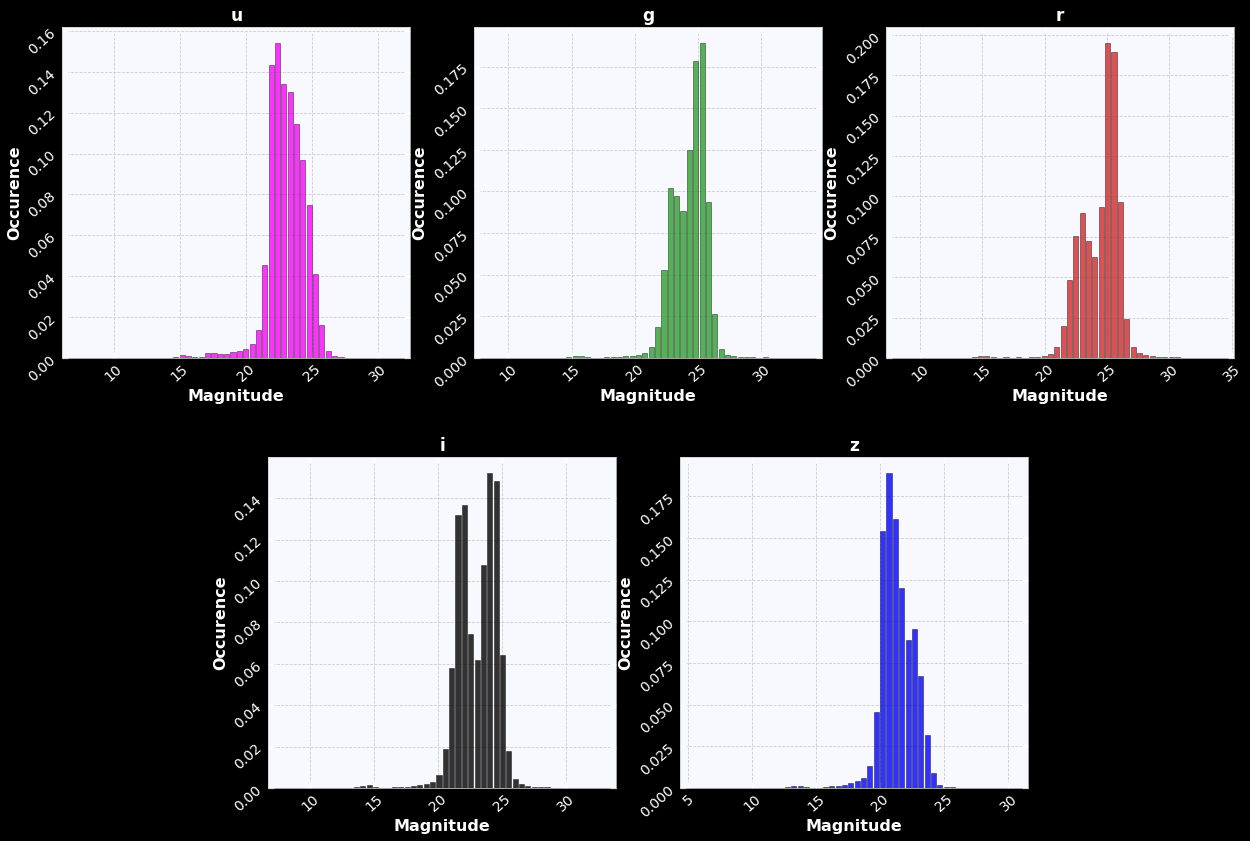

In [196]:
plt.figure(figsize=(7*3,7*2),
           facecolor='black')
gs = gridspec.GridSpec(2, 6)
gs.update(hspace=0.3, wspace=0.45)

ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:4])
ax3 = plt.subplot(gs[0, 4:6])
ax4 = plt.subplot(gs[1, 1:3])
ax5 = plt.subplot(gs[1, 3:5])
axes = [ax1, ax2, ax3, ax4, ax5]
colors = ['magenta', 'tab:green', 'tab:red', 'black', 'blue']

for col_i, ax in enumerate(axes):
    col = cols[col_i]
    ax.set_facecolor('ghostwhite')
    
    ax.bar(center[col], hist[col] / hist[col].sum(), width=width[col],
           color=colors[col_i], alpha=0.8,
           ec='black', lw=0.5, align='center')
    ax.set_title(col, fontsize=axistitlesize-5, fontweight='bold', color='white')
    ax.set_xlabel('Magnitude', fontsize=axislabelsize, fontweight='bold',
                  labelpad=5, color='white')
    ax.set_ylabel('Occurence', fontsize=axislabelsize, fontweight='bold',
                  color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize,
                   labelrotation=42, colors='white')
    ax.tick_params(axis='both', which='minor', labelsize=axisticksize-4,
                   labelrotation=42, colors='white')

plt.show()

### Challenge 4. 
What are the largest galaxies in the SDSS, in terms of size?
HINT: Look at surface brightness and ellipticity. Use the *PhotoObjAll* table and investigate the petrosian radius.

In [178]:
cols = ['u', 'g', 'r', 'i', 'z']
rad_cols = ['petroRad_{0}'.format(c) for c in cols]
mag_cols = ['petroMag_{0}'.format(c) for c in cols]

In [185]:
queries = []

for c in cols:
    query = """
    SELECT TOP 10000
        objID,
        petroRad_{0}, petroMag_{0}
    FROM
        PhotoObjAll
    WHERE
        petroMag_{0} > -9999 AND
        type = 3;
    """.format(c)    
    queries.append(query)

res_list = []
for query in queries:
    res = CasJobs.executeQuery(query, context='DR16')
    res_list.append(res)

##### Petrosian radius

In [186]:
hist = {}
bins = {}
width = {}
center = {}

for c, res in zip(rad_cols, res_list):
    hist[c], bins[c] = np.histogram(res[c], bins=50, density=True)
    width[c] = 0.8 * (bins[c][1] - bins[c][0])
    center[c] = (bins[c][:-1] + bins[c][1:]) / 2

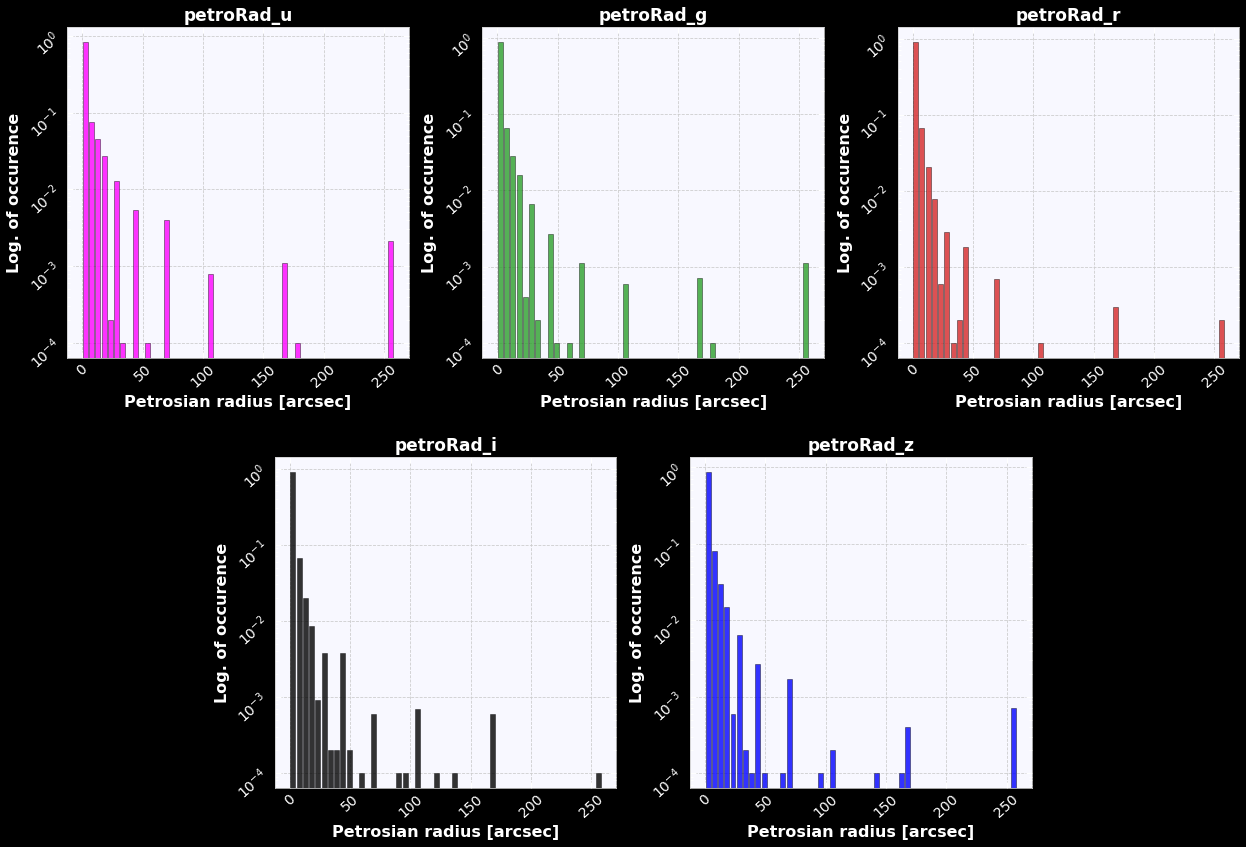

In [187]:
plt.figure(figsize=(7*3,7*2),
           facecolor='black')
gs = gridspec.GridSpec(2, 6)
gs.update(hspace=0.3, wspace=0.55)

ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:4])
ax3 = plt.subplot(gs[0, 4:6])
ax4 = plt.subplot(gs[1, 1:3])
ax5 = plt.subplot(gs[1, 3:5])
axes = [ax1, ax2, ax3, ax4, ax5]
colors = ['magenta', 'tab:green', 'tab:red', 'black', 'blue']

for col_i, ax in enumerate(axes):
    col = rad_cols[col_i]
    ax.set_facecolor('ghostwhite')
    ax.set_yscale('log')
    
    ax.bar(center[col], hist[col] / hist[col].sum(), width=width[col],
           color=colors[col_i], alpha=0.8,
           ec='black', lw=0.5, align='center')
    ax.set_title(col, fontsize=axistitlesize-5, fontweight='bold', color='white')
    ax.set_xlabel('Petrosian radius [arcsec]', fontsize=axislabelsize, fontweight='bold',
                  labelpad=5, color='white')
    ax.set_ylabel('Log. of occurence', fontsize=axislabelsize, fontweight='bold',
                  color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize,
                   labelrotation=42, colors='white')
    ax.tick_params(axis='both', which='minor', labelsize=axisticksize-4,
                   labelrotation=42, colors='white')

plt.show()

##### Petrosian magnitude

In [188]:
hist = {}
bins = {}
width = {}
center = {}

for c, res in zip(mag_cols, res_list):
    hist[c], bins[c] = np.histogram(res[c], bins=50, density=True)
    width[c] = 0.8 * (bins[c][1] - bins[c][0])
    center[c] = (bins[c][:-1] + bins[c][1:]) / 2

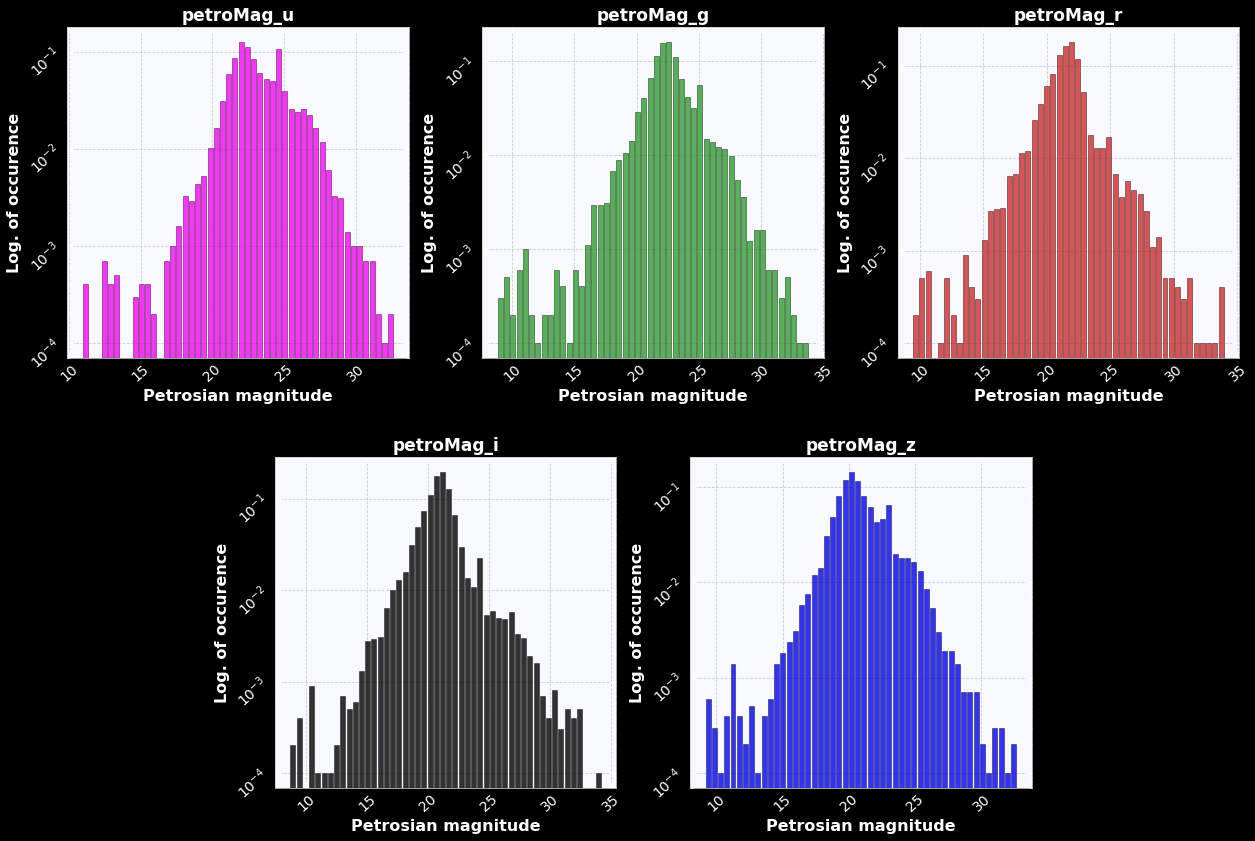

In [189]:
plt.figure(figsize=(7*3,7*2),
           facecolor='black')
gs = gridspec.GridSpec(2, 6)
gs.update(hspace=0.3, wspace=0.55)

ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:4])
ax3 = plt.subplot(gs[0, 4:6])
ax4 = plt.subplot(gs[1, 1:3])
ax5 = plt.subplot(gs[1, 3:5])
axes = [ax1, ax2, ax3, ax4, ax5]
colors = ['magenta', 'tab:green', 'tab:red', 'black', 'blue']

for col_i, ax in enumerate(axes):
    col = mag_cols[col_i]
    ax.set_facecolor('ghostwhite')
    ax.set_yscale('log')
    
    ax.bar(center[col], hist[col] / hist[col].sum(), width=width[col],
           color=colors[col_i], alpha=0.8,
           ec='black', lw=0.5, align='center')
    ax.set_title(col, fontsize=axistitlesize-5, fontweight='bold', color='white')
    ax.set_xlabel('Petrosian magnitude', fontsize=axislabelsize, fontweight='bold',
                  labelpad=5, color='white')
    ax.set_ylabel('Log. of occurence', fontsize=axislabelsize, fontweight='bold',
                  color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize,
                   labelrotation=42, colors='white')
    ax.tick_params(axis='both', which='minor', labelsize=axisticksize-4,
                   labelrotation=42, colors='white')

plt.show()

#### Conclusion

The biggest galaxies seems to be the ones with petrosian radius of $250$ arcsecs, while the brightest with petrosian magnitude of $10$.

### Challenge 5. 
Find all objects with spectra classified as unknown. Use the *PhotoObjAll* table and filter for the *type* field.

In [92]:
query = """
SELECT
    p.objID,
    p.ra, p.dec,
    p.z AS PhotoZ,
    s.z AS SpecZ
FROM
    PhotoObjAll p
JOIN
    SpecObjAll s
ON
    s.bestObjID = p.objID
WHERE
    p.type = 0
ORDER BY
    SpecZ ASC;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,objID,ra,dec,PhotoZ,SpecZ
0,1237657586561581162,41.994155,0.423123,-9999,-0.000316
1,1237657586561581162,41.994155,0.423123,-9999,-0.000311
2,1237648703509758180,198.092613,-0.625398,-9999,-0.000220
3,1237648705130397835,220.891932,0.635288,-9999,-0.000181
4,1237648704594903046,224.043353,0.215485,-9999,-0.000171
...,...,...,...,...,...
141,1237648703519719426,220.749631,-0.623598,-9999,1.820005
142,1237648705119191271,195.386103,0.633744,-9999,1.830931
143,1237648705119191271,195.386103,0.633744,-9999,1.831473
144,1237651801769836969,147.345651,0.516564,-9999,2.231863


### Challenge 6. 
Find the broad absorption line (BAL) quasars in the SDSS database. At what redshifts are most BAL quasars found? Use the *ancillary_target1* field of the *SpecObjAll* table.

Need to find the following columns:

| Name    | Value              | Description                                                                           |
|:-------:|:------------------:|:-------------------------------------------------------------------------------------:|
| FBQSBAL | 0x0000000000008000 | Broad absorption line (BAL) quasar with spectrum from the FIRST Bright Quasar Survey  |
| LBQSBAL | 0x0000000000010000 | Broad absorption line (BAL) quasar with spectrum from the Large Bright Quasar Survey  |
| ODDBAL  | 0x0000000000020000 | Broad absorption line (BAL) quasar with various unusual properties (selected by hand) |
| OTBAL   | 0x0000000000040000 | Photometrically-selected overlapping-trough (OT) broad absorption line (BAL) quasar   |
| PREVBAL | 0x0000000000080000 | Broad absorption line (BAL) quasar with prior spectrum from SDSS-I/-II                |
| VARBAL  | 0x0000000000100000 | Photometrically-selected candidate broad absorption line (BAL) quasar                 |

In [102]:
query = """
SELECT
    bestObjID,
    ra, dec, z,
    ancillary_target1
FROM
    SpecObjAll
WHERE
    ancillary_target1 = 0x0000000000008000 OR
    ancillary_target1 = 0x0000000000010000 OR
    ancillary_target1 = 0x0000000000020000 OR
    ancillary_target1 = 0x0000000000040000 OR
    ancillary_target1 = 0x0000000000080000 OR
    ancillary_target1 = 0x0000000000100000
ORDER BY
    z ASC;
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,bestObjID,ra,dec,z,ancillary_target1
0,1237658916919115982,184.15012,54.533125,0.000000,1048576
1,1237655369833840760,223.46973,56.205656,0.000000,1048576
2,1237665126932807843,183.61473,33.746308,0.000000,1048576
3,1237658300067741757,151.22573,6.692970,0.000000,1048576
4,1237660635465449475,178.74453,47.202741,0.000000,1048576
...,...,...,...,...,...
1782,1237658492269953029,158.23072,8.584236,6.571713,1048576
1783,1237671140408950915,178.65251,3.001771,6.784917,262144
1784,1237662504293630237,239.14073,35.299264,6.800890,262144
1785,1237652943699378592,329.95960,12.788459,6.806266,262144


In [110]:
hist = {}
bins = {}
width = {}
center = {}

cols = ['ra', 'dec', 'z']
for c in cols:
    hist[c], bins[c] = np.histogram(res[c], bins=40, density=True)
    width[c] = 0.8 * (bins[c][1] - bins[c][0])
    center[c] = (bins[c][:-1] + bins[c][1:]) / 2

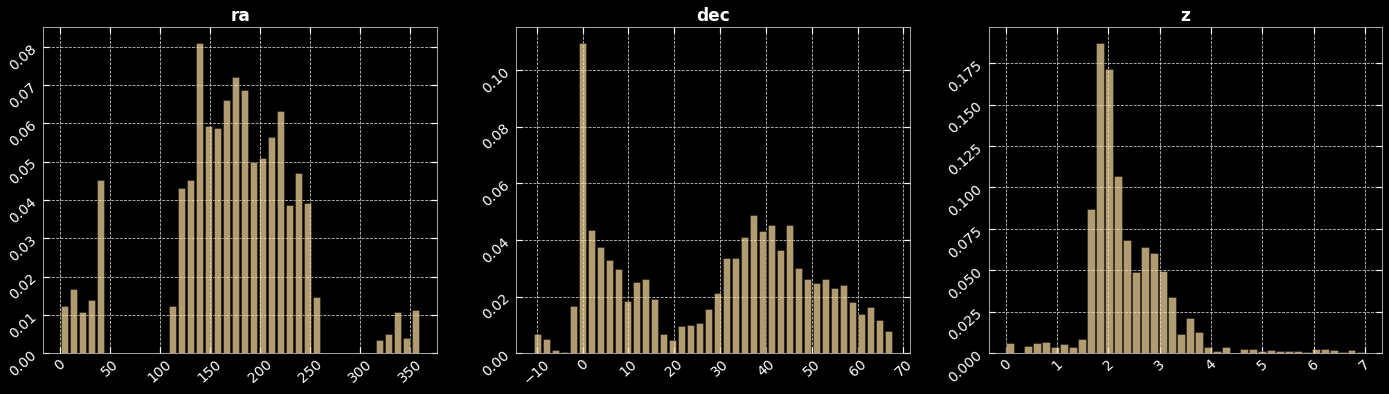

In [111]:
ncols = 3
nrows = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8, nrows*6),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

# Loop through axes/features
for col_i, ax in enumerate(axes.reshape(-1)):
    col = cols[col_i]

    ax.bar(center[col], hist[col] / hist[col].sum(), width=width[col],
           color=cm.magma(0.93), alpha=0.7,
           ec='black', lw=0.5, align='center')
    ax.set_title(col, fontsize=axistitlesize-5, fontweight='bold', color='white')
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize,
                   labelrotation=42, colors='white')
    ax.tick_params(axis='both', which='minor', labelsize=axisticksize-4,
                   labelrotation=42, colors='white')

#plt.suptitle('Fig. 2. Distribution of non-binary labels in the original dataset.',
#             color='white', fontsize=axistitlesize+5, y=-0.04)

if not os.path.exists(out):
    os.makedirs(out)
plt.savefig(out + 'fig_1_dist_pre.png',
            format='png', dpi=200,
            facecolor='black', edgecolor='black',
            bbox_inches='tight')

plt.show()

Which means, most of the BAL quasars are approximately between $1.6 \leq z \leq 3.8$.

### Challenge 7. 
Find variable stars in the SDSS (stars imaged more than once whose magnitudes changed by more than 0.1 between observations). How variable are the stars? To search for objects with multiple observations you can find [here](http://skyserver.sdss.org/dr8/en/help/cooking/stars/morethanonce2.asp) some help.

In [207]:
query = """
SELECT TOP 1000
    t.thingid, t.ndetect, d.objid,
    s.psfMag_r, s.psfMagerr_r
FROM
    thingIndex AS t
JOIN
    detectionindex AS d
ON
    t.thingid = d.thingid
JOIN
    Star AS s
ON
    d.objid = p.objid
WHERE
    t.ndetect > 10; -- Variable stars are probably observed more than this
"""

res = CasJobs.executeQuery(query, context='DR16')
display(res)

,thingid,ndetect,objid,psfMag_r,psfMagerr_r
0,67257638,11,1237674283782701764,15.16039,0.011945
1,67561477,12,1237653010821022096,21.35092,0.059417
2,67569844,12,1237653010822594743,19.26118,0.016456
3,67572348,14,1237653010823053782,21.25379,0.057114
4,67624535,11,1237674283782767295,16.21387,0.009846
...,...,...,...,...,...
995,68172972,14,1237663782590415616,21.27392,0.045853
996,68172872,11,1237663782590415861,23.50768,0.279821
997,68173797,14,1237663782590480408,18.26514,0.020306
998,68174433,18,1237663782590480480,18.90001,0.021260


I couldn't finish it...